
#  Format of the Project

1. Data Decscritption and Research Question 
2. Data Preparation and Clean(done on Rstudio)
3. Exploratory Data Analysis - Some done in RStudio and the rest will be done on this note book.
4. Machine Learning and Prediction.
5. Deep Learning Prediction
6. Performance Evaluation and Comparision of Methods
7. Data Management Plan and author contributioon

# 1. Data Description and Research

This notebook looks into using various Python-based machine-learning and data science libraries in attemtp to build a machine learning model capabale of predictiing whether or not someone has heart disease based on thier medical attritbute.

## Problem Definition
 
In a statement:
> Given clinical parameters about a patient, can we predict whether our not they have heart disease. Given that the target is binary it means it is a binary classification problem

# # Data

> This heart disease dataset is curated by combining 5 popular heart disease datasets already available independently but not combined before. In this dataset, 5 heart datasets are combined over 11 common features which makes it the largest heart disease dataset available so far for research purposes. The five datasets used for its curation are:

*  Cleveland
*  Hungarian
*  Switzerland
*  Long Beach VA
*  Statlog (Heart) Data Set.

The original data came from the Cleavland data from the UCI Machine Learning Repository.https://ieee-dataport.org/open-access/heart-disease-dataset-comprehensive

## Evaluation

> If we can reach 90% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## Features

**Create Data Dictionary**

1.  age - Age, age in years(data type - numeric)
2.  sex - Sex(data type - binary):
    *   1 = male; 
    *   0 = female. 
3.  chest pain type - chest pain type(data type - nominal):
    *  1: Typical angina: chest pain related decrease blood supply to the heart;
    *  2: Atypical angina: chest pain not related to heart;
    *  3: Non-anginal pain: typically esophageal spasms (non heart related);
    *  4: Asymptomatic: chest pain not showing signs of disease.
4.  resting blood pressure - resting bp s(in mm Hg on admission to the hospital), (data type numeric):
    *  anything above 130-140 is typically cause for concern.
5.  serum cholesterol - Cholesterol in mg/dl(data type numeric):
    *  serum = LDL + HDL + .2 * triglycerides;
    *  above 200 is cause for concern;
6.  fasting blood sugar - fasting blood sugar(1,0 > 120 mg/dl), (data type - binary): 
    *   1 = true; 
    *   0 = false; 
    *  '>126' mg/dL signals diabetes.
7.  resting electrocardiogram results -restecg results(data type - nominal):
    *   0: Nothing to note;
    *   1: ST-T Wave abnormality:
      *   can range from mild symptoms to severe problems;
      *   signals non-normal heart beat.
    *   2: Possible or definite left ventricular hypertrophy:
      *   Enlarged heart's main pumping chamber.
8.  maximum heart rate achieved - max heart rate(71 - 202), (data type - numeric)
9.  exercise induced angina - exercise angina(data type binary):
    *   1 = yes; 
    *   0 = no.
10. oldpeak =ST - oldpeak(depression induced by exercise relative to rest), (data type - numeric):
    *   looks at stress of heart during excercise;
    *   unhealthy heart will stress more.
11. the slope of the peak exercise ST segment - ST slope(data type - nominal):
      *  1: Upsloping: better heart rate with excercise (uncommon);
      *  2: Flatsloping: minimal change (typical healthy heart);
      *  3: Downslopins: signs of unhealthy heart.
12. target - have disease or not (1=yes, 0=no) (= the predicted attribute) (data type - binary)

Note: No personal identifiable information (PPI) can be found in the dataset.

# 3. 3. Evaluation Data Analyis

In [1]:
# Importing all the tools I need
# Regular EDA and plotting libraries
import tensorflow as tf
import numpy as np # np is short for numpy
import pandas as pd # pandas is so commonly used, it's shortened to pd
import matplotlib.pyplot as plt
import seaborn as sns # seaborn gets shortened to sns

# We want our plots to appear in the notebook
%matplotlib inline 

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN #helps for classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder #helps for label one-hot encoding 
from sklearn.preprocessing import LabelEncoder #helps to encode bool/text variables to be numerical values

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score #helps to split training data and testing data
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score #helps to evaluate the prediction accuracy




#from sklearn.model_selection import train_test_split 





## Load the data

In [2]:
from google.colab import drive # Mount the google drive for data loading
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# After completing stage one and two I saved it to a csv file and uploaded to my drive to contiue work.
df = pd.read_csv("/content/drive/MyDrive/Integrated assesment/Clean_heart_data.csv") 
df.shape #rows and columns

(1018, 13)

## Data Exploration (exploratory data analysis or EDA)

My goal here is to find out more about the data and become a subject matter export on the dataset I am working with.

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types? - Completed
3. What's missing from the data and how do you deal with it? - Completed
4. Where are the outliers and why should you care about them? - Completed
5. How can you add, change or remove features to get more out of your data? - Pursuing.

In [ ]:
# The data looks ot be in good shape after stage loading.
df.head()

,Unnamed: 0,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,ST_slope,target
0,1,40,1,2,140,289,0,0,172,0,0.0,1,0
1,2,49,0,3,160,180,0,0,156,0,1.0,2,1
2,3,37,1,2,130,283,0,1,98,0,0.0,1,0
3,4,48,0,4,138,214,0,0,108,1,1.5,2,1
4,5,54,1,3,150,195,0,0,122,0,0.0,1,0


In [ ]:
# determing how much class 
df["target"].value_counts()

0    541
1    477
Name: target, dtype: int64

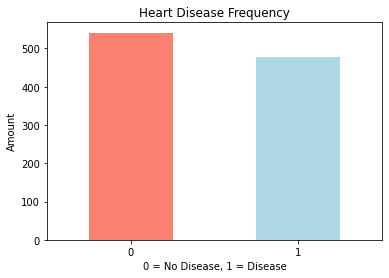

In [ ]:
df["target"].value_counts().plot(kind = "bar", color =["salmon","lightblue"]);
plt.title("Heart Disease Frequency")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.xticks(rotation = 0);

# The total number of person with heart diseasse is just under those without.  We can look aat it from a gender perspective next.

In [ ]:
## Heart Disease according to sex
df.sex.value_counts()

1    748
0    270
Name: sex, dtype: int64

In [ ]:
# compare target column with sex coloumn
pd.crosstab(df.target, df.sex)
# The data set contains more male participants.

sex,0,1
target,,
0,210,331
1,60,417


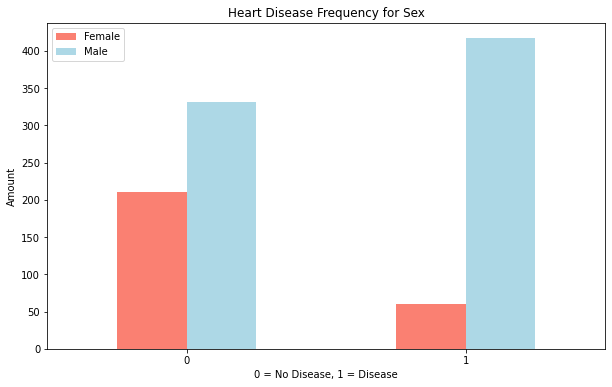

In [ ]:
# create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind = "bar", color = ["salmon", "lightblue"], figsize = (10, 6));

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation = 0);

## Age vs. max Heart Rate for Disease

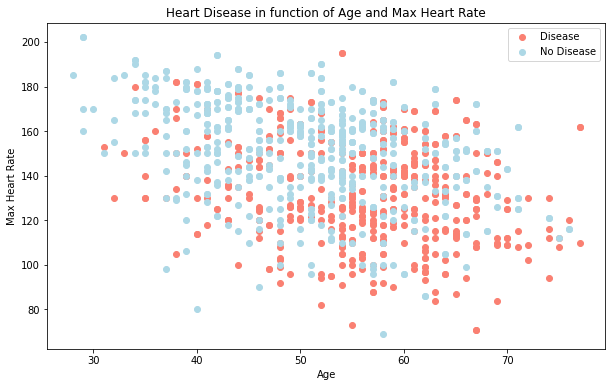

In [ ]:
# Create another figure
plt.figure(figsize = (10, 6))

# Scatter with positive examples
plt.scatter(df.age[df.target == 1],
           df.max_heart_rate[df.target == 1],
           c = "salmon")

# Scatter with negative examples

plt.scatter(df.age[df.target == 0],
           df.max_heart_rate[df.target == 0],
           c = "lightblue")

# Add some helpfull info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);
# infering from the plot we can see most of the data point is between 38 to 68
# Also tthe younger a person is the higher thier heart rate is and converse to that the older the person is thelower is thier heart rate.
# Heart disease participants is densely populated on the right hand side.

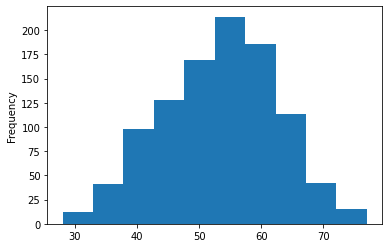

In [ ]:
# Checking distribution of age colunm with a Histogram
df.age.plot.hist();     

In [ ]:
from scipy.stats.mstats_basic import skew
# We can calculate skewness
skew(df.age)


masked_array(data=-0.12426938,
             mask=False,
       fill_value=1e+20)

## Heart Disease Frequecy per Chest pain Type

###chest pain type:
    *   1: Typical angina: chest pain related decrease blood supply to the heart;
    *   2: Atypical angina: chest pain not related to heart;
    *   3: Non-anginal pain: typically esophageal spasms (non heart related);
    *   4: Asymptomatic: chest pain not showing signs of disease.

In [ ]:
pd.crosstab(df.chest_pain_type, df.target)

target,0,1
chest_pain_type,,
1,41,20
2,181,28
3,185,64
4,134,365


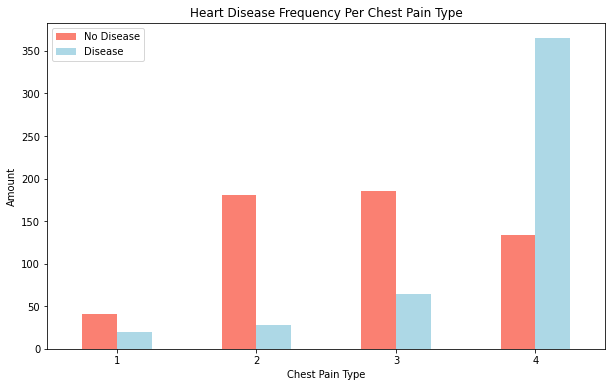

In [ ]:
# Make the crosstab more visible
pd.crosstab(df.chest_pain_type, df.target).plot(kind = "bar", figsize = (10, 6), color = ["salmon", "lightblue"])

# Asymtomatic is very high in value and this chest_pain feature needs tobe further investgated.
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = 0);

In [ ]:
# Need to refresh my mind on the data.
df.head()

,Unnamed: 0,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,ST_slope,target
0,1,40,1,2,140,289,0,0,172,0,0.0,1,0
1,2,49,0,3,160,180,0,0,156,0,1.0,2,1
2,3,37,1,2,130,283,0,1,98,0,0.0,1,0
3,4,48,0,4,138,214,0,0,108,1,1.5,2,1
4,5,54,1,3,150,195,0,0,122,0,0.0,1,0


In [ ]:
# Make a correlation matrix
df.corr()

,Unnamed: 0,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,ST_slope,target
Unnamed: 0,1.000000,0.254598,-0.065389,0.059660,-0.024570,0.009710,0.048949,0.338240,0.204896,-0.011182,0.149361,0.088892,0.053783
age,0.254598,1.000000,-0.000812,0.154295,0.259836,0.098634,0.209705,0.209592,-0.368447,0.205113,0.263868,0.246093,0.274112
sex,-0.065389,-0.000812,1.000000,0.115732,0.012293,-0.132119,0.083098,-0.009957,-0.147197,0.193492,0.112737,0.115535,0.296594
chest_pain_type,0.059660,0.154295,0.115732,1.000000,0.021156,0.083201,0.007749,0.077540,-0.331698,0.422245,0.258610,0.284335,0.450953
resting_bp_s,-0.024570,0.259836,0.012293,0.021156,1.000000,0.112951,0.169577,0.070335,-0.110420,0.143969,0.202187,0.141417,0.171239
cholesterol,0.009710,0.098634,-0.132119,0.083201,0.112951,1.000000,0.046838,0.100036,-0.012663,0.082348,0.053640,0.060548,0.105813
fasting_blood_sugar,0.048949,0.209705,0.083098,0.007749,0.169577,0.046838,1.000000,0.103228,-0.074700,0.082218,0.032999,0.120279,0.115842
resting_ecg,0.338240,0.209592,-0.009957,0.077540,0.070335,0.100036,0.103228,1.000000,0.027848,0.051557,0.132590,0.124677,0.126441
max_heart_rate,0.204896,-0.368447,-0.147197,-0.331698,-0.110420,-0.012663,-0.074700,0.027848,1.000000,-0.395850,-0.267506,-0.352877,-0.387733
exercise_angina,-0.011182,0.205113,0.193492,0.422245,0.143969,0.082348,0.082218,0.051557,-0.395850,1.000000,0.407772,0.417598,0.519148


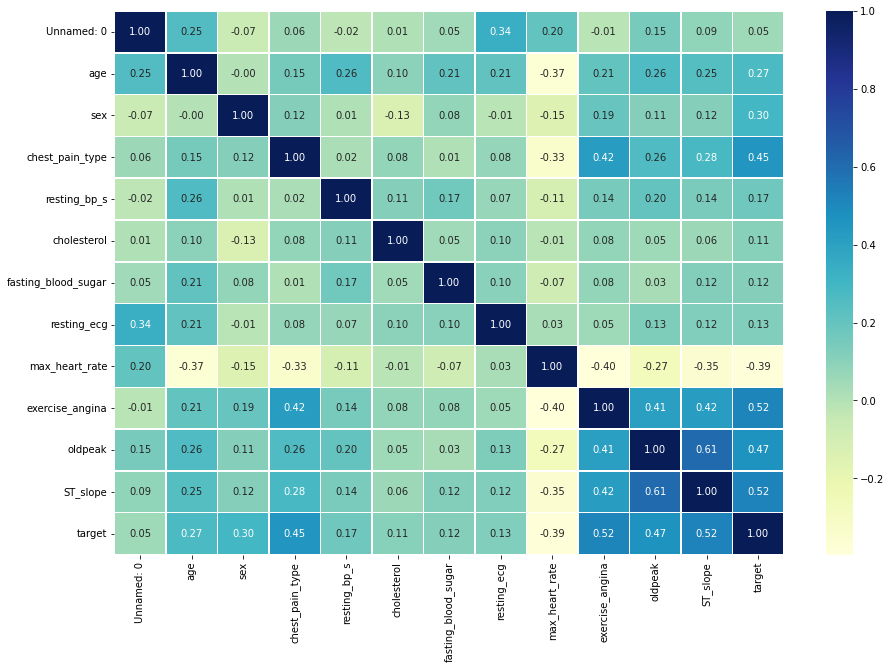

In [ ]:
# Better to plot it in order to better understand the data.
# Slope and chess_pain are amoung the features that has good correlation values

corr_matrix = df.corr()
fig, ax = plt.subplots(figsize = (15, 10))
ax = sns.heatmap(corr_matrix, annot = True, linewidths = 0.5, fmt = ".2f", cmap = "YlGnBu");

# bottom, top = ax.get_ylim()
# ax.set_ylim(bottom + 0.5, top - 0.5)

# 3.  Machine Learning Modeling and Prediction(RandomForest model)


*  We have 11 independent variables and a dependent(target) variable which is binary.
*  Given clinical parameters about a patient, can we predict whether or not they have heart disease?
*  Since the target is binary, we can use clasification models for the problem.

In [ ]:
df.head()

,Unnamed: 0,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,ST_slope,target
0,1,40,1,2,140,289,0,0,172,0,0.0,1,0
1,2,49,0,3,160,180,0,0,156,0,1.0,2,1
2,3,37,1,2,130,283,0,1,98,0,0.0,1,0
3,4,48,0,4,138,214,0,0,108,1,1.5,2,1
4,5,54,1,3,150,195,0,0,122,0,0.0,1,0


### I am going to use all the vairable to predict the target variable.
### Hence, I shall split of the target variable from the dataframe.

In [4]:
# split x/y
x = df.drop("target", axis = 1)
y = df["target"]

In [5]:
# Looking at x we can now see target is no longer int he dataframe.
x

,Unnamed: 0,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,ST_slope
0,1,40,1,2,140,289,0,0,172,0,0.0,1
1,2,49,0,3,160,180,0,0,156,0,1.0,2
2,3,37,1,2,130,283,0,1,98,0,0.0,1
3,4,48,0,4,138,214,0,0,108,1,1.5,2
4,5,54,1,3,150,195,0,0,122,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1013,1186,45,1,1,110,264,0,0,132,0,1.2,2
1014,1187,68,1,4,144,193,1,0,141,0,3.4,2
1015,1188,57,1,4,130,131,0,0,115,1,1.2,2
1016,1189,57,0,2,130,236,0,2,174,0,0.0,2


In [ ]:
# Now lut us inspect y.
y

0       0
1       1
2       0
3       1
4       0
       ..
1013    1
1014    1
1015    1
1016    1
1017    0
Name: target, Length: 1018, dtype: int64

In [6]:
# split the data into test and train sets.  I will use 20% as test_size since the data is fairly large.

np.random.seed(42)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [ ]:
x_train

,Unnamed: 0,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,ST_slope
137,138,39,1,2,120,241,0,1,146,0,2.0,1
780,953,60,1,4,145,282,0,2,142,1,2.8,2
754,927,61,1,3,150,243,1,0,137,1,1.0,2
289,290,48,0,2,133,308,0,1,156,0,2.0,1
899,1072,60,0,4,158,305,0,2,161,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
106,107,48,0,4,120,254,0,1,110,0,0.0,1
270,271,47,0,3,130,235,0,0,145,0,2.0,2
860,1033,47,1,3,108,243,0,0,152,0,0.0,1
435,608,51,0,4,114,258,1,2,96,0,1.0,1


In [ ]:
# We now have 814 samples to train on
y_train, len(y_train)

(137    0
 780    1
 754    0
 289    0
 899    1
       ..
 106    0
 270    0
 860    1
 435    0
 102    1
 Name: target, Length: 814, dtype: int64, 814)

We have now split the data into training and test sets, so it's time to build a machine learning model. We will train the model (find the patterns) on the training set, and then we will test it (use the patterns) on the test set.

I am going to try one of the different machine learning models. Choosing the right estimatar was done by using this map(https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html):

1. Logistic Regression(not going to be used)
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier.

Because our dataset is small, I can experiment to see which algorithm performs the best.  However, I shall Random Forest and KNN.  Both models can use the below mention procedures.

For training a model, model.fit(X_train, y_train), and scoring a model, model.score(X_train, y_train), all of the algorithms in the Scikit-Learn library use the same functions.

(x_test, y_test) score score() returns the percentage of correct predictions (1.0 = 100% correct).

Because the algorithms we've chosen use the same methods for fitting and evaluating them, let's put them in a dictionary and create a which fits and scores them.

In [ ]:
model = RandomForestClassifier(n_estimators=900)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

Evaluation of our classification models beyond "Accuracy."
We want:

* ROC curve and AUC score - plot_roc_curve()
* Confusion matrix - confusion_matrix()
* Classification report - classification_report()
* Precision - precision_score()
* Recall - recall_score()
* F1-score - f1_score()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


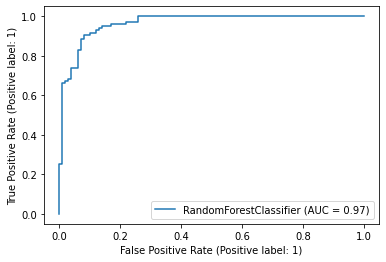

In [ ]:
# Plot ROC curve and calculate AUC metric
plot_roc_curve(model, x_test, y_test);

In [ ]:
# Display confusion matrix
print(confusion_matrix(y_test, y_pred))

[[90 10]
 [10 94]]


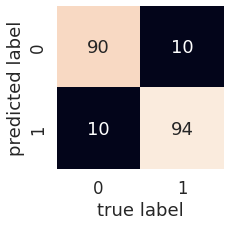

In [ ]:
# Seaborn already imported above
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_pred):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_pred),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, y_pred)

# There are 10 cases when the model should have predict zero when it shold have been one.
# There are 10 case when the model shoudl have predicted one when it shoud have predict zero.

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       100
           1       0.90      0.90      0.90       104

    accuracy                           0.90       204
   macro avg       0.90      0.90      0.90       204
weighted avg       0.90      0.90      0.90       204



* Precision - Thus score is too bad.  If the model falsely predict someone had heart disease further test can be done to varify.
* Recall - Seeing that this model is to be used to detect heart disease.  For every 10 person that is predict to have no heart disease one will be incorrect.  Ideally i would have like this recall score around 0.95 for this use.
* F1 score - A perfect model achieves an F1 score of 1.0. and our model
* Support - The number of samples each metric was calculated on.
* Accuracy - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0. and this model gives us 0.80.  Needs improvement.  
* Macro avg - This model does not take class imbalace into account.  Since we have clas imbalance I would not think to much about the score.
* Weighted avg - This method favors the majority class which in this case is zero.

# 4.  Deep learning Modeling and Prediction(KNN model)
1.   Data structure visualization. 
2.   Viariable transformation.
3.   Training data and testing data split. 

In [ ]:
# Getting my data
data = pd.read_csv("/content/drive/MyDrive/Integrated assesment/Clean_heart_data.csv") 
df.shape #rows and columns

(1018, 13)

In [ ]:
data_le = np.zeros_like(data)                    # Set up a matrix for encoded data 
data_le[:,0] = data.iloc[:,0]                    # The first coloum requires no encoding
for i in range(1, data.shape[1]):                # Encode the data using label encoder
   le = LabelEncoder().fit(data.iloc[:,i])
   data_le[:,i] = le.transform(data.iloc[:,i])

In [ ]:
print (data_le)

[[1.000e+00 1.200e+01 1.000e+00 ... 1.000e+00 1.000e+00 0.000e+00]
 [2.000e+00 2.100e+01 0.000e+00 ... 1.100e+01 2.000e+00 1.000e+00]
 [3.000e+00 9.000e+00 1.000e+00 ... 1.000e+00 1.000e+00 0.000e+00]
 ...
 [1.188e+03 2.900e+01 1.000e+00 ... 1.300e+01 2.000e+00 1.000e+00]
 [1.189e+03 2.900e+01 0.000e+00 ... 1.000e+00 2.000e+00 1.000e+00]
 [1.190e+03 1.000e+01 1.000e+00 ... 1.000e+00 1.000e+00 0.000e+00]]


In [ ]:
input = data_le[:,:-1]     # Features 
labels = data_le[:,-1:]    # labels

print ('Shape of features:', input.shape)
print ('Shape of labels:', labels.shape)

Shape of features: (1018, 12)
Shape of labels: (1018, 1)


In [ ]:
onehot = OneHotEncoder()                               #An objective for one-hot package
labels_onehot = onehot.fit_transform(labels).toarray() #Transform labels to be the one-hot format. For example, a sample belongs to the first class(denoted by 0), then its label will be transformed to be [1, 0] for a two-way classification.
print (labels_onehot)

[[1. 0.]
 [0. 1.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [1. 0.]]


# KNN Model Training

In [ ]:
classifier = KNN(n_neighbors=3, p = 2).fit(x_train, y_train)         # Model fitting using the KNN classifier
print ('training accuracy:', classifier.score(x_train, y_train))

training accuracy: 0.8022113022113022


### KNN Model Testing and Evaluation

In [ ]:
prediction = classifier.predict(x_test)                       # Predict the testing set
print (accuracy_score(prediction, y_test))                    # Evaluate the accuracy in the testing set

0.5784313725490197


In [ ]:
print(confusion_matrix(y_test,prediction))

[[62 38]
 [48 56]]


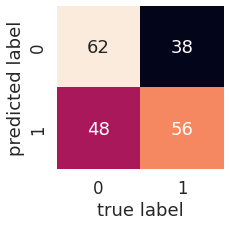

In [ ]:
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_pred):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, prediction),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, prediction)

# There are 38 cases when the model should have predict zero when it shold have been one.
# There are 48 case when the model shoudl have predicted one when it shoud have predict zero.

In [ ]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.56      0.62      0.59       100
           1       0.60      0.54      0.57       104

    accuracy                           0.58       204
   macro avg       0.58      0.58      0.58       204
weighted avg       0.58      0.58      0.58       204



RandomForest out perform this model in every one of the evaluation metrics.  Granted KNN performs poorly with outliers and an imbalance dataset, but, I removed the outliers and the imbalance is very small.  

#Nearal Network

###Create Training and Testing Datasets
Now that we have preprocessed the data appropriately, we can split it into training and testings datasets. We will use Sklearn's train_test_split() function to generate a training dataset (80 percent of the total data) and testing dataset (20 percent of the total data).

###Building and Training the Neural Network¶
Now that we have our data fully processed and split into training and testing datasets, we can begin building a neural network to solve this classification problem. Using keras, we will define a simple neural network with one hidden layer. Since this is a categorical classification problem, we will use a softmax activation function in the final layer of our network and a categorical_crossentropy loss during our training phase.

Importing tools.

In [21]:

# Importing the Keras libraries and packages
import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Split data into x/y

In [22]:
X = df.iloc[:,0:-1].values
y = df.iloc[:,-1].values

Split into Test/Train

In [9]:
# Split data in Train set and Test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [23]:
#  Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [6]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 12, kernel_initializer = 'he_uniform',activation='relu',input_dim = 12))

# Adding the second hidden layer
classifier.add(Dense(units = 12, kernel_initializer = 'he_uniform',activation='relu'))

# Adding the thrid hidden layer
classifier.add(Dense(units = 12, kernel_initializer = 'he_uniform',activation='relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [24]:
# Fitting the ANN to the Train set
model_history = classifier.fit(X_train,y_train,validation_split=0.33, batch_size=12,epochs=100)

Epoch 1/100
40/40 [==============================] - 0s 5ms/step - loss: 0.2607 - accuracy: 0.8973 - val_loss: 0.4770 - val_accuracy: 0.8085
Epoch 2/100
40/40 [==============================] - 0s 5ms/step - loss: 0.2595 - accuracy: 0.8952 - val_loss: 0.4762 - val_accuracy: 0.8085
Epoch 3/100
40/40 [==============================] - 0s 5ms/step - loss: 0.2592 - accuracy: 0.8994 - val_loss: 0.4784 - val_accuracy: 0.8085
Epoch 4/100
40/40 [==============================] - 0s 5ms/step - loss: 0.2582 - accuracy: 0.8973 - val_loss: 0.4777 - val_accuracy: 0.8085
Epoch 5/100
40/40 [==============================] - 0s 5ms/step - loss: 0.2564 - accuracy: 0.8994 - val_loss: 0.4790 - val_accuracy: 0.8085
Epoch 6/100
40/40 [==============================] - 0s 5ms/step - loss: 0.2556 - accuracy: 0.9015 - val_loss: 0.4792 - val_accuracy: 0.8085
Epoch 7/100
40/40 [==============================] - 0s 5ms/step - loss: 0.2546 - accuracy: 0.9015 - val_loss: 0.4800 - val_accuracy: 0.8085
Epoch 8/100
4

In [25]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [26]:
for i in range(len(y_pred)):
    print("Predicted %d------> Expected %d" %(y_pred[[i]],y_test[i]))

Predicted 0------> Expected 0
Predicted 0------> Expected 0
Predicted 0------> Expected 1
Predicted 0------> Expected 0
Predicted 1------> Expected 1
Predicted 0------> Expected 0
Predicted 0------> Expected 0
Predicted 0------> Expected 0
Predicted 1------> Expected 1
Predicted 0------> Expected 0
Predicted 0------> Expected 0
Predicted 1------> Expected 1
Predicted 0------> Expected 0
Predicted 0------> Expected 0
Predicted 1------> Expected 1
Predicted 0------> Expected 0
Predicted 1------> Expected 1
Predicted 1------> Expected 1
Predicted 0------> Expected 0
Predicted 0------> Expected 0
Predicted 0------> Expected 0
Predicted 1------> Expected 1
Predicted 1------> Expected 1
Predicted 0------> Expected 0
Predicted 0------> Expected 0
Predicted 1------> Expected 1
Predicted 0------> Expected 0
Predicted 1------> Expected 1
Predicted 0------> Expected 0
Predicted 1------> Expected 1
Predicted 0------> Expected 0
Predicted 1------> Expected 1
Predicted 0------> Expected 0
Predicted 

In [27]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[142,  21],
       [ 24, 119]])

In [28]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.8529411764705882

In [29]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

       False       0.87      0.86      0.86       166
        True       0.83      0.85      0.84       140

    accuracy                           0.85       306
   macro avg       0.85      0.85      0.85       306
weighted avg       0.85      0.85      0.85       306



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


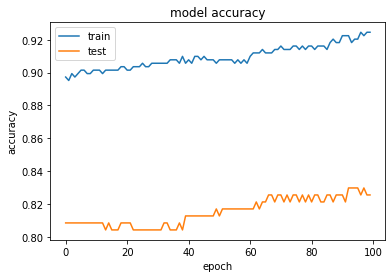

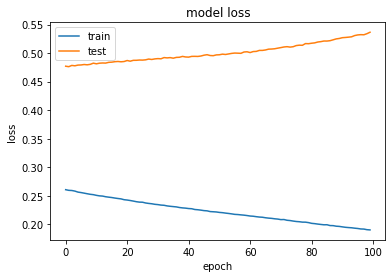

In [30]:
# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

There are 21 cases when the model should have predict zero when it shold have been one.

There are 24 case when the model shoudl have predicted one when it shoud have predict zero.

 

# Data Management Plan ad Author Contribution
This plan is in the appendix in the report.
Authors:

Mr. Sookchand Harripersad.